# Content-Based Filtering Recommendation Systems

## Basics of Recommendation Systems


Recommendation systems or recommender systems are one of the most successful and widespread application of machine learning techniques in business. You can find large scale recommender systems in retail, video on demand, or music streaming.

* help to increase the site’s page views, dwell time, click-through rate, and retention

* help generate more advertising revenue

* increase upselling and crossselling

**Examples of recommendation systems are:**

* offer on-line contents to  viewers or readers, based on a prediction of customers' interests, e.g., TikTok, YouTube

* offer customers of an on-line retailer suggestions about what they might want to buy, based on their past history of purchases and/or product searches, e.g., Amazon

* recommending movies to user based on their previous watch, e.g., Netflix, see also [Netflix Prize](https://en.wikipedia.org/wiki/Netflix_Prize) 

<img src="https://raw.githubusercontent.com/jalajthanaki/Movie_recommendation_engine/master/img/2_2.png" 
align="middle" alt="Figure 2.2" data-canonical-src="" style="width:100%;height:100%">

<img src="https://raw.githubusercontent.com/jalajthanaki/Movie_recommendation_engine/master/img/2_4.png" 
align="middle" alt="Figure 2.4" data-canonical-src="" style="width:80%;height:80%">


Two main approaches to the design of recommender systems are **content-based filtering** and **collaborative filtering**. 

* Content-Based Filtering is used to produce items recommendation based on items’ characteristics.

* Collaborative filtering produces recommendations based on the knowledge of users’ attitude such as ratings, towards items.

## MovieLens Dataset

We will use the famous [MovieLens dataset (small)](https://grouplens.org/datasets/movielens), which is one of the most popular datasets used when implementing and testing recommender systems. It contains ~100,000 ratings from ~600 users on ~9700 movies. **None of the users has rated on all movies.**


![](https://md.ekstrandom.net/talks/2014/txstate-recsys-research/movielens.png)

## Import Libraries 

In [1]:
from math import sqrt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Reading ratings file
ratings = pd.read_csv('ratings.csv', sep=',', encoding='latin-1', usecols=['userId','movieId','rating','timestamp'])

# Reading movies file
movies = pd.read_csv('movies.csv', sep=',', encoding='latin-1', usecols=['movieId','title','genres'])

In [3]:
df_movies = movies
df_ratings = ratings

## Exploratory Data Analysis(EDA)

In [4]:
df_movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [5]:
print('There are ' + str(df_movies.movieId.nunique()) + ' movies.')

There are 9742 movies.


In [6]:
print('There are ' + str(df_ratings.userId.nunique()) + ' users.')

There are 610 users.


In [7]:
print('There are ' + str(df_ratings.shape[0]) + ' ratings.')

There are 100836 ratings.


### Most popular genres of movie released

<BarContainer object of 19 artists>

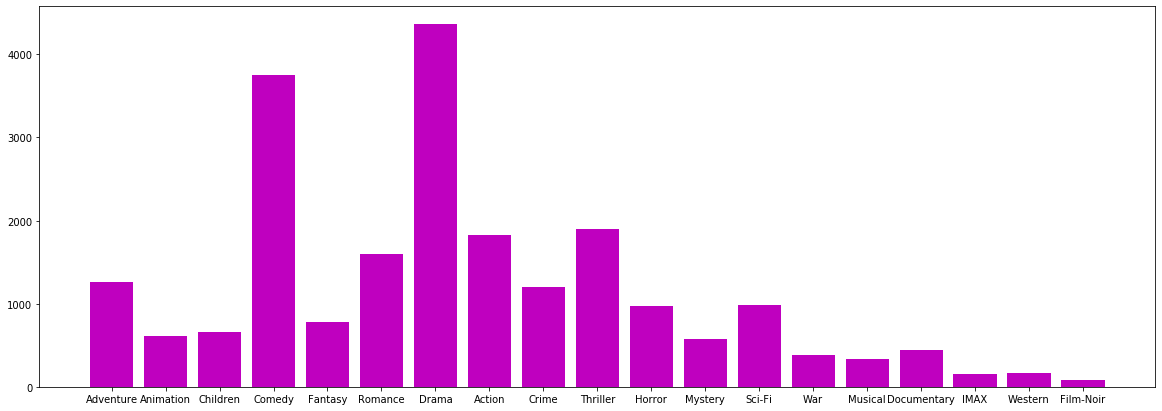

In [8]:
plt.figure(figsize=(20,7))
generlist = df_movies['genres'].apply(lambda generlist_movie : str(generlist_movie).split("|"))
geners_count = {}

for generlist_movie in generlist:
    for gener in generlist_movie:
        if(geners_count.get(gener,False)):
            geners_count[gener]=geners_count[gener]+1
        else:
            geners_count[gener] = 1       
geners_count.pop("(no genres listed)")
plt.bar(geners_count.keys(),geners_count.values(),color='m')

In [9]:
df_ratings.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


### Distribution of users rating

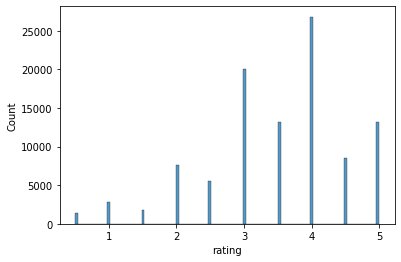

In [10]:
sns.histplot(df_ratings["rating"]);

In [11]:
print("Shape of frames: \n"+ " Rating DataFrame"+ str(df_ratings.shape)+"\n Movies DataFrame"+ str(df_movies.shape))

Shape of frames: 
 Rating DataFrame(100836, 4)
 Movies DataFrame(9742, 3)


In [12]:
merge_ratings_movies = pd.merge(df_movies, df_ratings, on='movieId', how='inner')

In [13]:
merge_ratings_movies.head(10)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3.5,1455209816
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,4.0,965705637
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,21,3.5,1407618878
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,27,3.0,962685262
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,31,5.0,850466616


In [14]:
merge_ratings_movies.drop('timestamp', axis=1, inplace = True)
merge_ratings_movies.head(10)

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3.5
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,4.0
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,21,3.5
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,27,3.0
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,31,5.0


In [15]:
merge_ratings_movies.shape

(100836, 5)

**Group the ratings based on users**

In [16]:
ratings_grouped_by_users = merge_ratings_movies.groupby('userId').agg([np.size, np.mean])

In [17]:
ratings_grouped_by_users.head(10)

movieId               rating          
          size          mean   size      mean
userId                                       
1          232   1854.603448  232.0  4.366379
2           29  70350.275862   29.0  3.948276
3           39   7058.384615   39.0  2.435897
4          216   1982.129630  216.0  3.555556
5           44    343.840909   44.0  3.636364
6          314    389.041401  314.0  3.493631
7          152  10908.256579  152.0  3.230263
8           47    297.978723   47.0  3.574468
9           46   3707.043478   46.0  3.260870
10         140  51465.307143  140.0  3.278571

In [18]:
ratings_grouped_by_users.drop('movieId', axis = 1, inplace = True)
ratings_grouped_by_users.head(10)

rating          
         size      mean
userId                 
1       232.0  4.366379
2        29.0  3.948276
3        39.0  2.435897
4       216.0  3.555556
5        44.0  3.636364
6       314.0  3.493631
7       152.0  3.230263
8        47.0  3.574468
9        46.0  3.260870
10      140.0  3.278571

### Top 10 users who have rated most of the movies

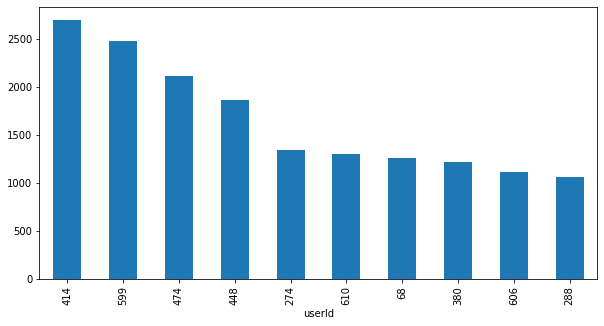

In [19]:
ratings_grouped_by_users['rating']['size'].sort_values(ascending=False).head(10).plot(kind = 'bar', figsize = (10,5))

In [20]:
ratings_grouped_by_users['rating']['size'].sort_values(ascending=False).head(10)

userId
414    2698.0
599    2478.0
474    2108.0
448    1864.0
274    1346.0
610    1302.0
68     1260.0
380    1218.0
606    1115.0
288    1055.0
Name: size, dtype: float64

In [21]:
ratings_grouped_by_movies = merge_ratings_movies.groupby('movieId').agg([np.mean], np.size)

In [22]:
ratings_grouped_by_movies.shape

(9724, 2)

In [23]:
ratings_grouped_by_movies.head(10)

,userId,rating
,mean,mean
movieId,,
1,306.530233,3.920930
2,329.554545,3.431818
3,283.596154,3.259615
4,219.857143,2.357143
5,299.571429,3.071429
6,309.647059,3.946078
7,279.000000,3.185185
8,258.250000,2.875000


In [24]:
ratings_grouped_by_movies = ratings_grouped_by_movies.drop('userId', axis=1)
ratings_grouped_by_movies.head(10)

,rating
,mean
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429
6,3.946078
7,3.185185
8,2.875000


### Movies with high average rating

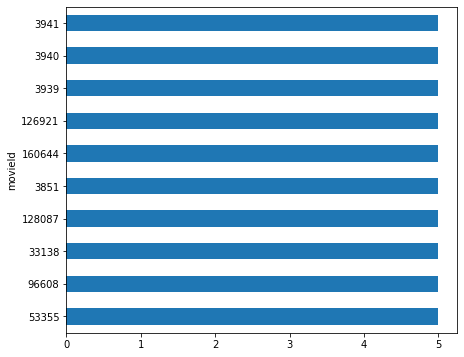

In [25]:
ratings_grouped_by_movies['rating']['mean'].sort_values(ascending=False).head(10).plot(kind='barh', figsize=(7,6));

### Movies with low average rating

In [26]:
low_rated_movies_filter = ratings_grouped_by_movies['rating']['mean']< 1.5

In [27]:
low_rated_movies = ratings_grouped_by_movies[low_rated_movies_filter]

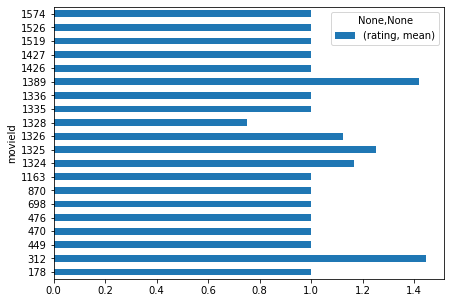

In [28]:
low_rated_movies.head(20).plot(kind='barh', figsize=(7,5));

In [29]:
low_rated_movies.head(10)

,rating
,mean
movieId,
178,1.000000
312,1.444444
449,1.000000
470,1.000000
476,1.000000
698,1.000000
870,1.000000
1163,1.000000


## Content-based Filtering

Content-based filtering methods are best suited to situations where there is known data on an item (name, location, description, etc.), but not on the user. 

* Recommendation of items are based on: user's previous purcheses, views and likes

* Generate **similarity** score from item atrributes. Here we use movie genres.

* Recommend the items based on similarity score

For example, if a user likes movies such as ‘Mission Impossible’ then we can recommend him the movies with the genre ‘Action’.


#### Term Frequency-Inverse Document Frequency (TF-IDF)
The concepts of Term Frequency (TF) and Inverse Document Frequency (IDF) are used in information retrieval systems and also content based filtering mechanisms (such as a content based recommender). They are used to determine the relative importance of a document / article / news item / movie etc.

![](https://mungingdata.files.wordpress.com/2017/11/equation.png?w=430&h=336)


We will consider genres as an important parameter to recommend user the movie he or she watches based on generes of movie user has already watched.

#### Cosine Similarity

For calculating similarity/distance, many similarity coefficients can be calculated. Most widely used similarity coefficients are Euclidean, Cosine, Pearson Correlation etc. We will use cosine similarity here.


<img src="https://raw.githubusercontent.com/jalajthanaki/Movie_recommendation_engine/master/img/2_14.png" 
align="middle" alt="Figure 2.14" data-canonical-src="" style="width:60%;height:60%">

* cosine similarity value `[-1,1]` 
* particularly used in positive space, where the outcome is neatly bounded in `[0,1]`
* very efficient to evaluate, especially for sparse vectors.

| Value of $\cos\theta$ | Value of $\theta$ | Conclusion|
|:---:|:---: |:---:|
| +1 |$0^{\circ}$   | Vectors are very similar |
|  0 |$90^{\circ}$  | Vectors are not similar (orthogonal vectors)|
| -1 |$180^{\circ}$ | Vectors are diametrically dissimilar |

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define a TF-IDF Vectorizer Object.
tfidf_movies_genres = TfidfVectorizer(token_pattern = '[a-zA-Z0-9\-]+')

#Replace NaN with an empty string
df_movies['genres'] = df_movies['genres'].replace(to_replace="(no genres listed)", value="")

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_movies_genres_matrix = tfidf_movies_genres.fit_transform(df_movies['genres'])

print(tfidf_movies_genres.get_feature_names())

print(tfidf_movies_genres_matrix.shape)

['action', 'adventure', 'animation', 'children', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'film-noir', 'horror', 'imax', 'musical', 'mystery', 'romance', 'sci-fi', 'thriller', 'war', 'western']
(9742, 19)


**Compute the cosine similarity matrix**

Let
$\mathbf{G} = 
\begin{bmatrix}
— g_1^\top — \\
— g_2^\top — \\
\dots \\
— g_{9742}^\top — 
\end{bmatrix}\in\mathbb{R}^{9742\times19}$ be the move genres matrix after TF-IDF vectorization, with each row $g_i^\top$ being the TF-IDF vector for the $i$-th movie's genres, then the cosine similarity matrix $\mathbf{C}\in\mathbb{R}^{9742\times9742}$ is conveniently computed by

$$
C_{i,j} = \frac{\langle g_i, g_j \rangle}{\|g_i\| \|g_j\|},
$$

representing the cosine similarity between $g_i$ and $g_j$, i.e., $i$-th and $j$-th movies' genres.

The cosine similarity matrix $\mathbf{C}$ is symmetric, and the $i$-th row or coloumn gives the cosine similarities between the $i$-th movie's genres and all movies' genres (including itself).

In [31]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim_movies = cosine_similarity(tfidf_movies_genres_matrix, tfidf_movies_genres_matrix)

print(cosine_sim_movies.shape)

(9742, 9742)


**Recommend new movies that are similar to a movie based on genres**

In [32]:
def get_recommendations_based_on_genres(movie_title, cosine_sim_movies=cosine_sim_movies, n_recommendations = 2):
    """
    Calculates top 2 movies to recommend based on given movie titles genres. 
    :param movie_title: title of movie to be taken for base of recommendation
    :param cosine_sim_movies: cosine similarity between movies 
    :return: Titles of movies recommended to user
    """
    
    
    # Get the index of the movie that matches the title
    idx_movie = df_movies.loc[df_movies['title'].isin([movie_title])]
    
    idx_movie = idx_movie.index
    
    
    
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores_movies = list(enumerate(cosine_sim_movies[idx_movie][0]))
            
    
    # Sort the movies based on the similarity scores
    sim_scores_movies = sorted(sim_scores_movies, key=lambda x: x[1], reverse=True)
    
    
    
    # Get the indices of of the most similar movies
    movie_indices = []
    
    i = 0
    
    # Return the most similar movies

    
    while len(movie_indices) < n_recommendations:
        if sim_scores_movies[i][0]!=idx_movie:
            movie_indices.append(sim_scores_movies[i][0])
        i += 1


    return df_movies.iloc[movie_indices]['title']

In [33]:
get_recommendations_based_on_genres("Toy Story (1995)", n_recommendations = 5)

1706                                       Antz (1998)
2355                                Toy Story 2 (1999)
2809    Adventures of Rocky and Bullwinkle, The (2000)
3000                  Emperor's New Groove, The (2000)
3568                             Monsters, Inc. (2001)
Name: title, dtype: object

In [34]:
get_recommendations_based_on_genres('Harry Potter and the Chamber of Secrets (2002)', n_recommendations = 5)

1598                             Dark Crystal, The (1982)
2157                                     Excalibur (1981)
2845               Sinbad and the Eye of the Tiger (1977)
3638    Lord of the Rings: The Fellowship of the Ring,...
4137        Lord of the Rings: The Two Towers, The (2002)
Name: title, dtype: object

In [35]:
get_recommendations_based_on_genres('Looper (2012)', n_recommendations = 5)

145                   Judge Dredd (1995)
6106    District 13 (Banlieue 13) (2004)
8915                Suicide Squad (2016)
8982                  Tokyo Tribe (2014)
2249                    RoboCop 2 (1990)
Name: title, dtype: object

**Recommend new movies that are similar to the movies a user has watched**

In [36]:
def get_recommendation_content_model(userId):
    """
    Calculates top movies to be recommended to user based on movie user has watched.  
    :param userId: userid of user
    :return: List of titles of movies recommended to user
    """
    
    recommended_movie_list = []
    movie_list = []
    df_rating_filtered = df_ratings[df_ratings["userId"]== userId]
    
    for key, row in df_rating_filtered.iterrows():
        movie_list.append((df_movies["title"][row["movieId"]==df_movies["movieId"]]).values) 
    

    for index, movie in enumerate(movie_list):
        for key, movie_recommended in get_recommendations_based_on_genres(movie[0]).iteritems():
            recommended_movie_list.append(movie_recommended)

     # removing already watched movies from recommended list    
    for movie_title in recommended_movie_list:
        if movie_title in movie_list:
            recommended_movie_list.remove(movie_title)
    
    return set(recommended_movie_list)

In [37]:
get_recommendation_content_model(userId=1)

{'101 Dalmatians (One Hundred and One Dalmatians) (1961)',
 '39 Steps, The (1935)',
 'Adventures in Babysitting (1987)',
 'Aladdin (1992)',
 'Alamo, The (1960)',
 'Alien Nation (1988)',
 'Amateur (1994)',
 'Amazing Panda Adventure, The (1995)',
 'Antz (1998)',
 'Apocalypse Now (1979)',
 'Aristocats, The (1970)',
 'Around the World in 80 Days (1956)',
 'Assassins (1995)',
 'Austin Powers: The Spy Who Shagged Me (1999)',
 'BURN-E (2008)',
 'Babes in Toyland (1934)',
 'Backbeat (1993)',
 'Balto (1995)',
 'Barb Wire (1996)',
 'Barbarella (1968)',
 'Batman: Mystery of the Batwoman (2003)',
 'Beat the Devil (1953)',
 'Before and After (1996)',
 'Ben-Hur (1959)',
 'Beverly Hills Cop III (1994)',
 'Big Bully (1996)',
 'Big Country, The (1958)',
 'Black Hole, The (1979)',
 'Blues Brothers 2000 (1998)',
 'Boot, Das (Boat, The) (1981)',
 'Bride of Frankenstein, The (Bride of Frankenstein) (1935)',
 'Broken Arrow (1996)',
 'Brothers Bloom, The (2008)',
 "Bug's Life, A (1998)",
 'Captain Blood (193

In [38]:
get_recommendation_content_model(userId=10)

{'300: Rise of an Empire (2014)',
 'Aladdin and the King of Thieves (1996)',
 'Alice in Wonderland (2010)',
 'Along Came a Spider (2001)',
 'American President, The (1995)',
 'American Tail, An (1986)',
 'Apollo 13 (1995)',
 'Around the World in 80 Days (1956)',
 'Assassins (1995)',
 'Asterix and Cleopatra (AstÃ©rix et ClÃ©opÃ¢tre) (1968)',
 'Babes in Toyland (1934)',
 'Batman Forever (1995)',
 'Beauty and the Beast (1991)',
 'Ben-Hur (1959)',
 'Beowulf & Grendel (2005)',
 'Big Bully (1996)',
 'Blood and Chocolate (2007)',
 'Bolt (2008)',
 'Broken Arrow (1996)',
 "Bug's Life, A (1998)",
 'Captain Horatio Hornblower R.N. (1951)',
 'Cinderella (1950)',
 'Cloud Atlas (2012)',
 'Corpse Bride (2005)',
 'Crossing Guard, The (1995)',
 'Dark Crystal, The (1982)',
 'Dark Knight, The (2008)',
 'Doom Generation, The (1995)',
 "Dracula (Bram Stoker's Dracula) (1992)",
 "Dragon Ball: Sleeping Princess in Devil's Castle (Doragon bÃ´ru: MajinjÃ´ no nemuri hime) (1987)",
 'Dragon Ball: The Curse Of Th

## Exercise

Modify the code so that content-based filtering only recommends movies similar to a user's top 5 or 10 favorate movies that he has watched.